In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("data/daily_min_temp.csv", index_col='Date', parse_dates=['Date'])
df.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


# Resampling Data Time Series

<AxesSubplot:xlabel='Date'>

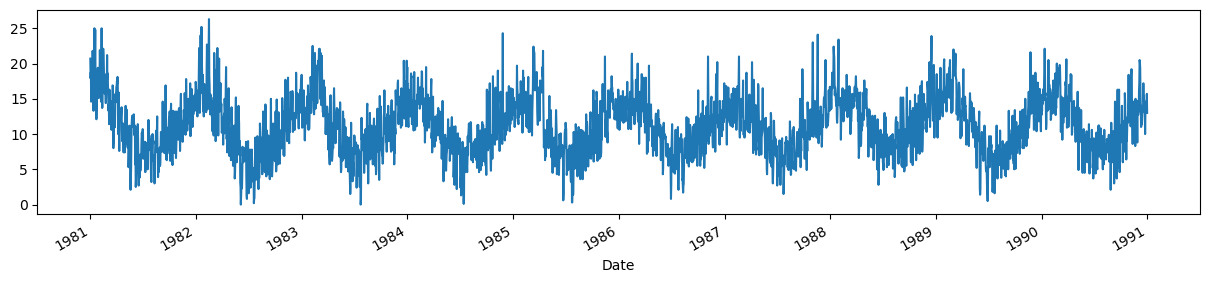

In [5]:
df.Temp.plot(figsize=(15,3))

In [8]:
df = df.resample("M").mean()
df

,Temp
Date,
1981-01-31,17.712903
1981-02-28,17.678571
1981-03-31,13.500000
1981-04-30,12.356667
1981-05-31,9.490323
...,...
1990-08-31,7.825806
1990-09-30,9.166667
1990-10-31,11.345161


<AxesSubplot:xlabel='Date'>

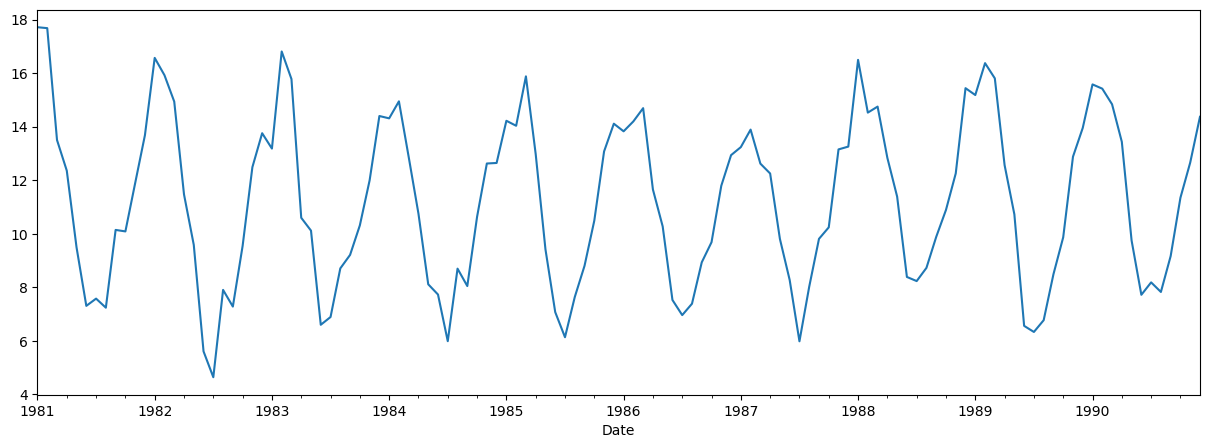

In [9]:
df.Temp.plot(figsize=(15,5))

# Naive Forecasting

## One-Shift 

hanya digeser

In [10]:
pred = df.copy()
pred = pred.shift()
pred

,Temp
Date,
1981-01-31,NaN
1981-02-28,17.712903
1981-03-31,17.678571
1981-04-30,13.500000
1981-05-31,12.356667
...,...
1990-08-31,8.183871
1990-09-30,7.825806
1990-10-31,9.166667


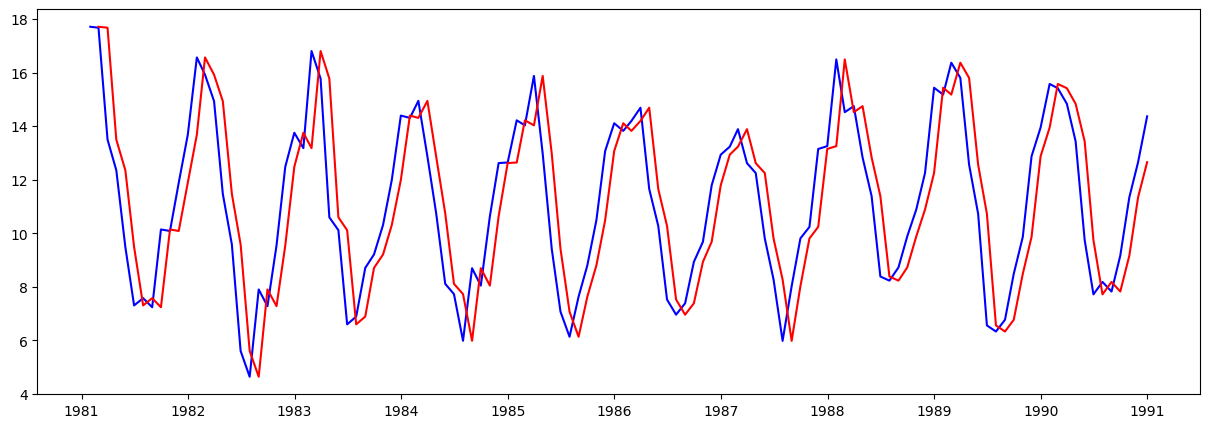

In [12]:
plt.figure(figsize=(15, 5))
plt.plot(df, 'b-')
plt.plot(pred, 'r-')

### Mean as Forecast 

In [14]:
pred = df.copy()
pred.Temp = [df.loc[:date].Temp.mean() for date in df.index]
pred = pred.shift()

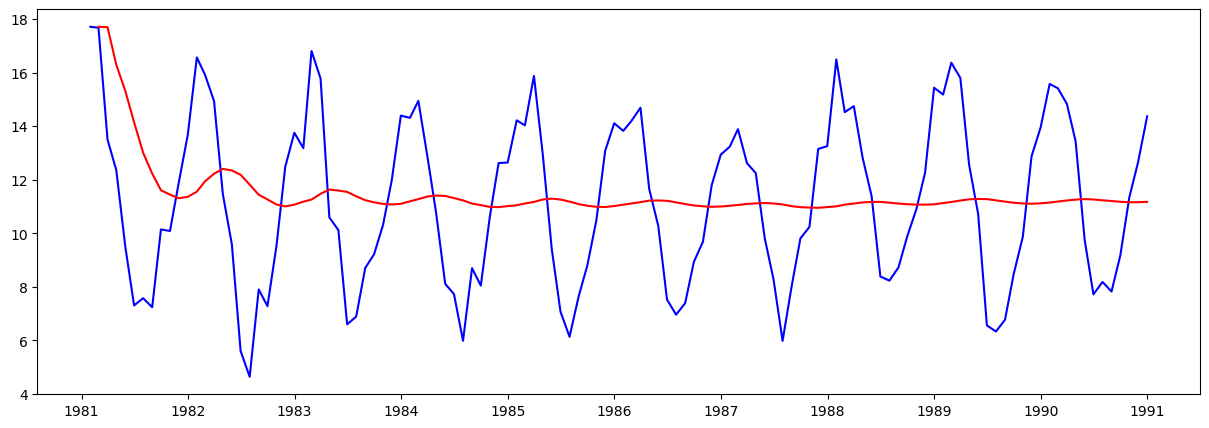

In [16]:
plt.figure(figsize=(15,5))
plt.plot(df, "b-")
plt.plot(pred, "r-")

### Moving Average / Rolling Mean Forecasting

In [19]:
pred = df.copy()
pred.Temp = df.rolling(3).mean()
pred = pred.shift()

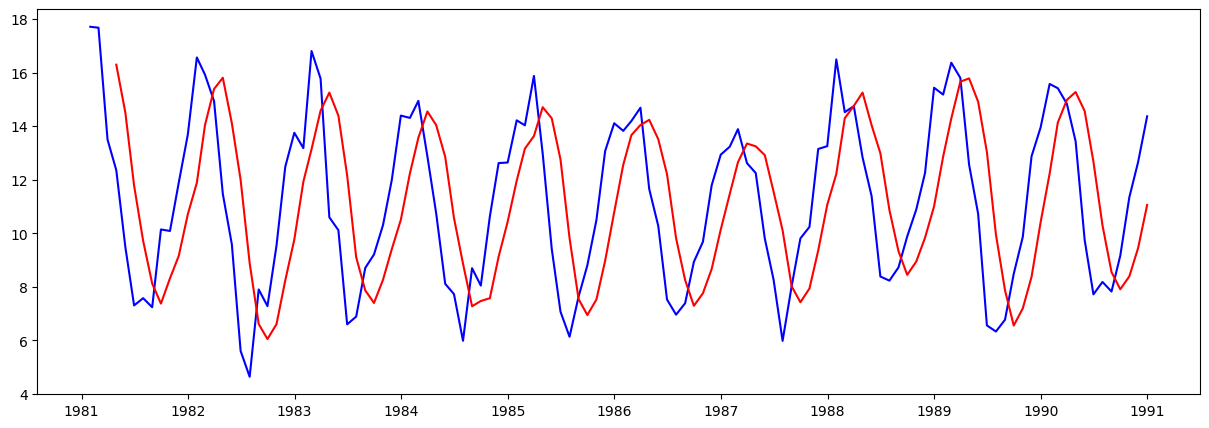

In [21]:
plt.figure(figsize=(15,5))
plt.plot(df, 'b-')
plt.plot(pred, 'r-')